In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import joblib
import matplotlib.pyplot as plt



In [20]:
pip install tensorflow


                                              0.0/390.2 MB ? eta -:--:--
                                              0.2/390.2 MB 5.6 MB/s eta 0:01:10
                                              0.3/390.2 MB 4.5 MB/s eta 0:01:28
                                              0.7/390.2 MB 5.9 MB/s eta 0:01:07
                                              0.8/390.2 MB 4.6 MB/s eta 0:01:24
                                              1.2/390.2 MB 5.7 MB/s eta 0:01:09
                                              1.3/390.2 MB 4.9 MB/s eta 0:01:19
                                              1.7/390.2 MB 5.5 MB/s eta 0:01:11
                                              1.8/390.2 MB 5.6 MB/s eta 0:01:09
                                              2.2/390.2 MB 5.4 MB/s eta 0:01:12
                                              2.5/390.2 MB 5.4 MB/s eta 0:01:12
                                              2.7/390.2 MB 5.4 MB/s eta 0:01:12
                                              3

In [2]:
data = pd.read_csv("task1/train1.csv")

In [3]:
data.head(5)

,date,price
0,01-01-2014,9
1,02-01-2014,14
2,03-01-2014,11
3,04-01-2014,20
4,05-01-2014,17


In [4]:
data.describe()

,price
count,1369.000000
mean,20.878013
std,6.786889
min,4.000000
25%,16.000000
50%,20.000000
75%,25.000000
max,50.000000


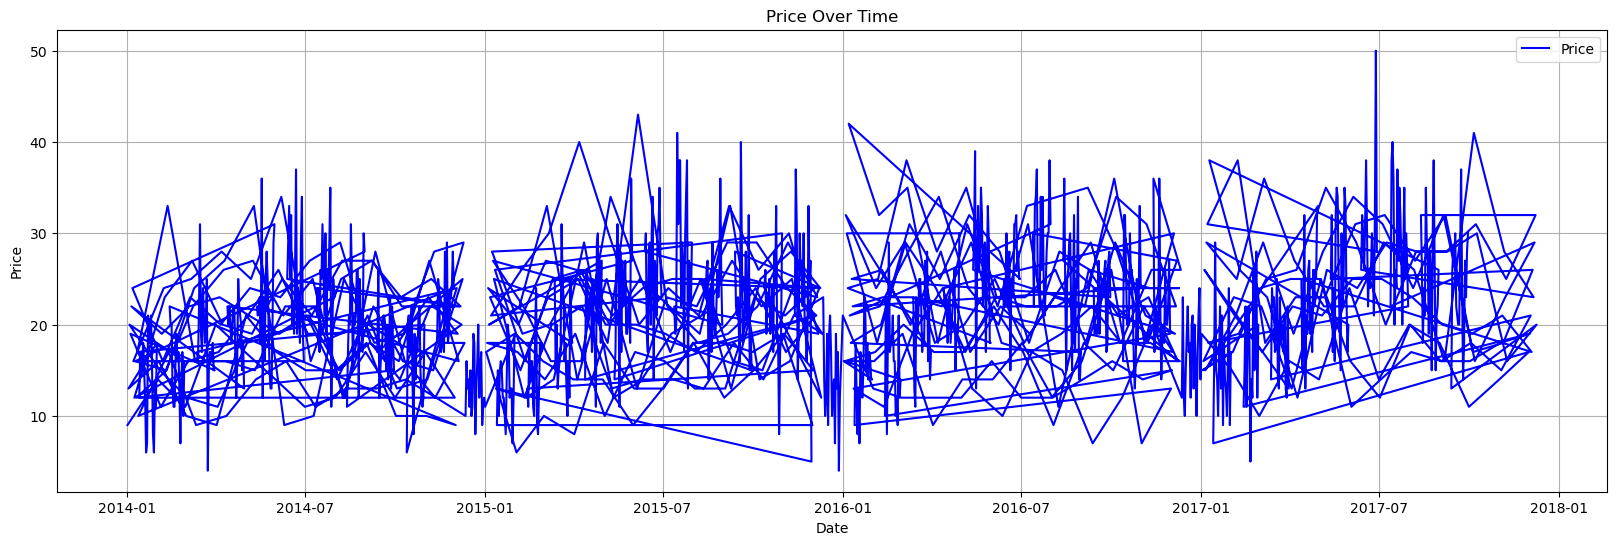

In [14]:
plt.figure(figsize=(20, 6))
plt.plot(data['date'], data['price'], label='Price', color='blue')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Load and preprocess data
data = pd.read_csv('task1/train1.csv')  # Training data CSV
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')
data['days'] = (data['date'] - data['date'].min()).dt.days  # Convert dates to numeric
values = data['price'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Save the scaler for testing
joblib.dump(scaler, 'scaler.pkl')


Epoch 1/20


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1249
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0199
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0201
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0177
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0177
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189
Epoch 11/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174
Epoch 12/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0176
Epoch 13/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181
Epoch 14/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0172
Epoch 15/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179
Epoch 16/20
43/43 ━━━━━━━━━━━━

Training completed and model saved.


In [ ]:
# Prepare training data for LSTM
X_train, y_train = [], []
for i in range(1, len(scaled_values)):
    X_train.append(scaled_values[i - 1:i])
    y_train.append(scaled_values[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Save the model
model.save('stock_price_model.h5')

print("Training completed and model saved.")


,date,price,days
0,2014-01-01,9,0
1,2014-01-02,14,1
2,2014-01-03,11,2
3,2014-01-04,20,3
4,2014-01-05,17,4
...,...,...,...
1364,2017-09-26,18,1364
1365,2017-09-27,27,1365
1366,2017-09-28,23,1366
1367,2017-09-29,28,1367
